In [2]:
#Loading the libraries.


import pandas as pd #Data analysis and manipulation tool
import numpy as np #For nuumerical calculations

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Libraries for various model parameter selection.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics


In [4]:
df = pd.read_csv('E:/Netzwerk/Practice/Heart Disease/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.shape

(303, 14)

In [8]:
#Looking at the dataset, it is difficult to understand the features so renaming the names for better understanding.

df.rename(columns={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_Blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar','restecg':'ECG_results','thalach':'Maximum_heartrate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack',}, inplace = True)

In [9]:
df.head()

,Age,Sex,Chest_pain,Resting_Blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heartrate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.isnull().sum() #No missing values

Age                        0
Sex                        0
Chest_pain                 0
Resting_Blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heartrate          0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

In [11]:
df1 = df.copy()
df1

,Age,Sex,Chest_pain,Resting_Blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heartrate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
df1['Sex'].replace({1:'Male',0:'Female'},inplace = True)
df1['Heart_attack'].replace({1:'Yes',0:'No'},inplace = True)

In [13]:
df1.head(60)

,Age,Sex,Chest_pain,Resting_Blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heartrate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,Yes
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,Yes
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,Yes
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,Yes
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,Yes
5,57,Male,0,140,192,0,1,148,0,0.4,1,0,1,Yes
6,56,Female,1,140,294,0,0,153,0,1.3,1,0,2,Yes
7,44,Male,1,120,263,0,1,173,0,0.0,2,0,3,Yes
8,52,Male,2,172,199,1,1,162,0,0.5,2,0,3,Yes
9,57,Male,2,150,168,0,1,174,0,1.6,2,0,2,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                        303 non-null int64
Sex                        303 non-null int64
Chest_pain                 303 non-null int64
Resting_Blood_pressure     303 non-null int64
Cholesterol                303 non-null int64
Fasting_blood_sugar        303 non-null int64
ECG_results                303 non-null int64
Maximum_heartrate          303 non-null int64
Exercise_induced_angina    303 non-null int64
ST_depression              303 non-null float64
ST_slope                   303 non-null int64
Major_vessels              303 non-null int64
Thalassemia_types          303 non-null int64
Heart_attack               303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.corr()


,Age,Sex,Chest_pain,Resting_Blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heartrate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Resting_Blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ECG_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Maximum_heartrate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
ST_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


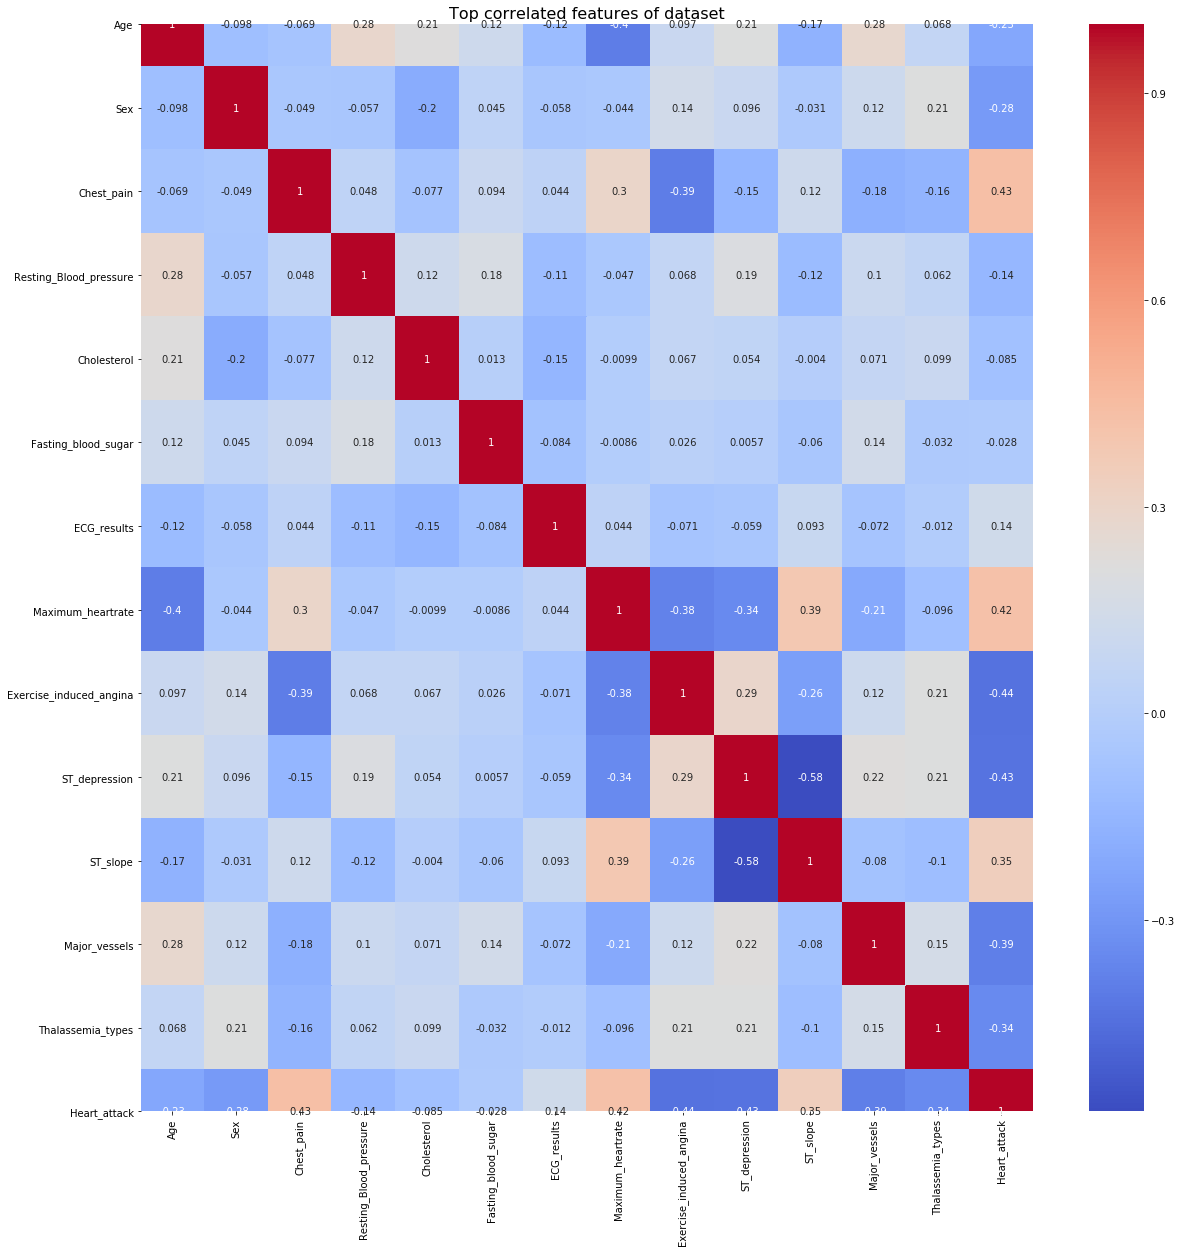

In [16]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title('Top correlated features of dataset', size=16)
plt.show()

# EDA

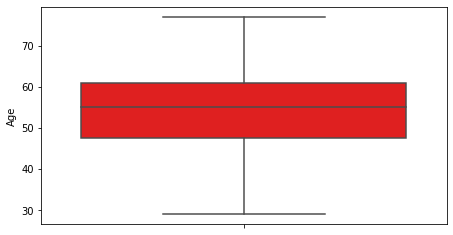

In [17]:
#Age visualisation 

fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
sns.boxplot(y = df['Age'], ax=ax1, color='red')
describe = df['Age'].describe().to_frame().round(2)

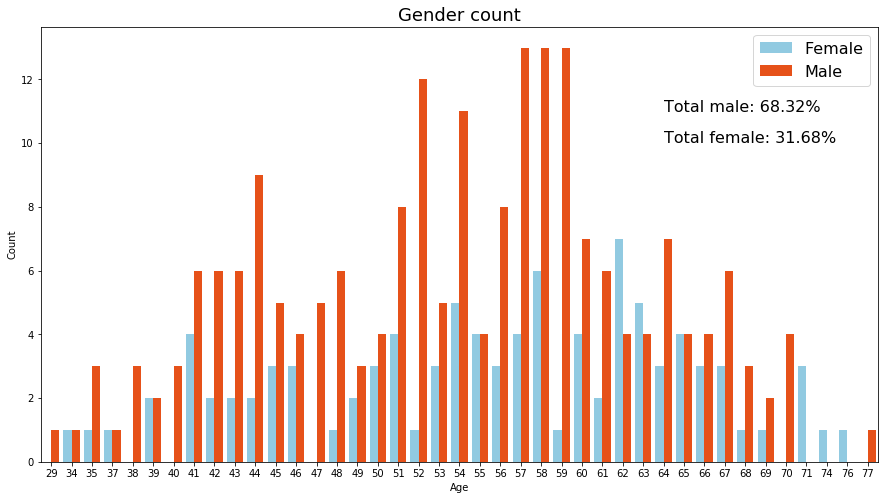

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(df['Age'], hue=df['Sex'], palette=['skyblue','orangered'], saturation=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender count', fontsize=18)
plt.legend(loc='upper right', fontsize=16, labels=['Female', 'Male'])
plt.text(30, 11,'Total male: {:.2f}%'.format(((df['Sex'].value_counts()[1])/(len(df)))*100), fontsize=16)
plt.text(30,10,'Total female: {:.2f}%'.format(((df['Sex'].value_counts()[0])/(len(df)))*100), fontsize=16)
plt.show()

In [19]:
#Relation between age, sex and number of heart attacks. 

s= df1.groupby(['Sex','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,Age,Heart_attack
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


In [20]:
#Relation between chest pain type and heart attacks

s= df1.groupby(['Sex','Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='OrRd')

,Sex,Chest_pain,Heart_attack
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


In [21]:
# Relation between Resting blood pressure and heart attack

s= df1.groupby(['Sex','Resting_Blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap= 'BuPu')

,Sex,Resting_Blood_pressure,Heart_attack
46,Male,120,27
54,Male,130,24
60,Male,140,22
40,Male,110,16
15,Female,130,12
50,Male,125,11
21,Female,140,10
66,Male,150,10
10,Female,120,10
52,Male,128,9


In [22]:
# Relation between Resting blood pressure and heart attack

s= df1.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap= 'BuPu')

,Sex,Cholesterol,Heart_attack
115,Male,212,5
109,Male,204,4
135,Male,234,4
134,Male,233,4
172,Male,282,4
150,Male,254,4
48,Female,269,4
144,Male,246,3
143,Male,245,3
141,Male,243,3


In [23]:
s= df1.groupby(['Sex','Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Fasting_blood_sugar,Heart_attack
2,Male,0,174
0,Female,0,84
3,Male,1,33
1,Female,1,12


In [24]:
s= df1.groupby(['Sex','ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,ECG_results,Heart_attack
3,Male,0,103
4,Male,1,103
1,Female,1,49
0,Female,0,44
2,Female,2,3
5,Male,2,1


In [25]:

s= df1.groupby(['Sex','Maximum_heartrate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')



,Sex,Maximum_heartrate,Heart_attack
86,Male,144,7
77,Male,132,7
103,Male,162,7
113,Male,173,7
82,Male,140,6
42,Female,172,6
91,Male,150,6
70,Male,125,6
97,Male,156,6
34,Female,163,5


In [26]:
s= df1.groupby(['Sex','Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')


,Sex,Exercise_induced_angina,Heart_attack
2,Male,0,130
3,Male,1,77
0,Female,0,74
1,Female,1,22


In [27]:
s= df1.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
27,Male,0,64
0,Female,0,35
37,Male,1.2,13
34,Male,0.8,10
36,Male,1,9
41,Male,1.8,8
38,Male,1.4,8
33,Male,0.6,8
43,Male,2,7
40,Male,1.6,7


In [28]:
s= df1.groupby(['Sex','ST_slope'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,ST_slope,Heart_attack
5,Male,2,96
4,Male,1,95
2,Female,2,46
1,Female,1,45
3,Male,0,16
0,Female,0,5


In [29]:
s= df1.groupby(['Sex','Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Major_vessels,Heart_attack
4,Male,0,111
0,Female,0,64
5,Male,1,50
6,Male,2,25
7,Male,3,16
1,Female,1,15
2,Female,2,13
8,Male,4,5
3,Female,3,4


In [30]:
s= df1.groupby(['Sex','Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,Sex,Thalassemia_types,Heart_attack
7,Male,3,102
6,Male,2,87
2,Female,2,79
5,Male,1,17
3,Female,3,15
0,Female,0,1
1,Female,1,1
4,Male,0,1


In [31]:
#From the heatmap, Resting bood pressure, cholesterol and maximum heart rate are the main features related to heart attack.

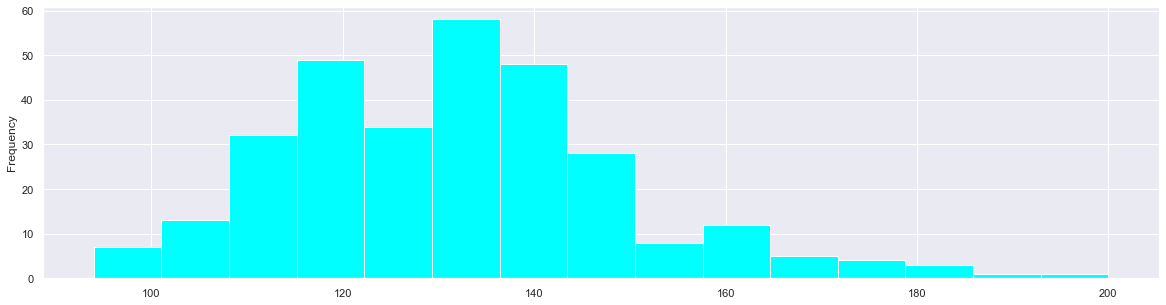

In [32]:
sns.set(rc={'figure.figsize':(20,5)})
df['Resting_Blood_pressure'].plot.hist(bins = 15, color = 'cyan')

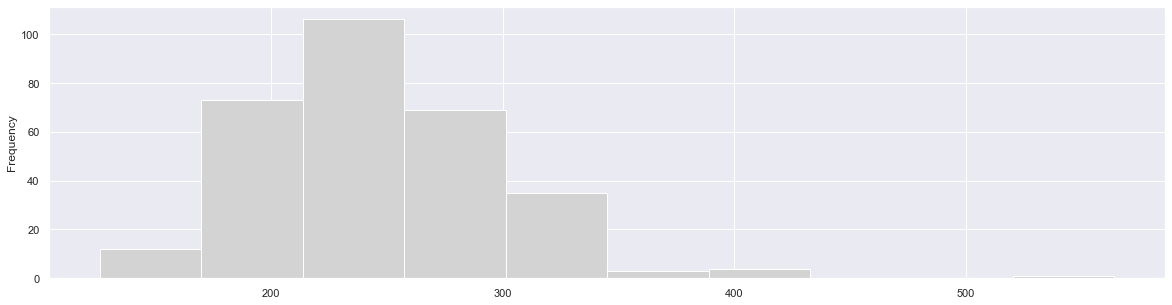

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
df['Cholesterol'].plot.hist(bins = 10, color = 'lightgrey')

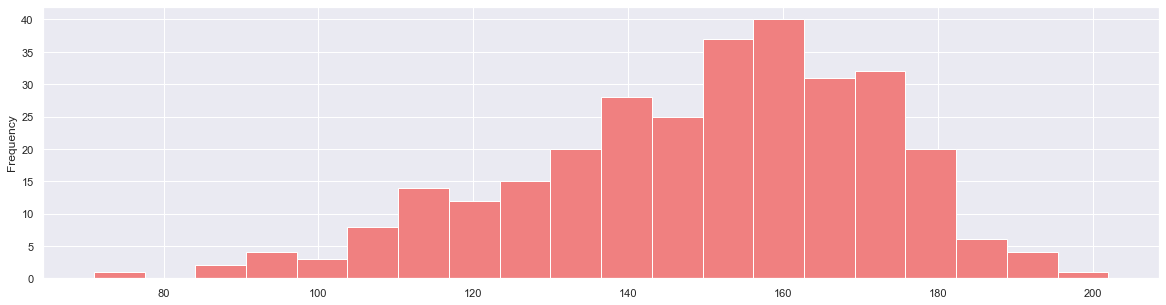

In [34]:
sns.set(rc={'figure.figsize':(20,5)})
df['Maximum_heartrate'].plot.hist(bins = 20, color = 'lightcoral')

# Data preperation, Model Selection and Training


### KNN

In [35]:
y = df['Heart_attack']
X = df.drop('Heart_attack',axis=1)

In [36]:
sc = StandardScaler()
X = sc.fit_transform(X) #fit calculates mean, variance of each data and transform standardized the data using m & v
X.shape


(303, 13)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

For k = 19, accuracy = {1: 0.819672131147541, 2: 0.819672131147541, 3: 0.8360655737704918, 4: 0.8524590163934426, 5: 0.819672131147541, 6: 0.8524590163934426, 7: 0.8360655737704918, 8: 0.8852459016393442, 9: 0.8524590163934426, 10: 0.8852459016393442, 11: 0.8360655737704918, 12: 0.819672131147541, 13: 0.8524590163934426, 14: 0.8524590163934426, 15: 0.8524590163934426, 16: 0.8524590163934426, 17: 0.8524590163934426, 18: 0.8524590163934426, 19: 0.819672131147541}


Text(0, 0.5, 'Accuracy')

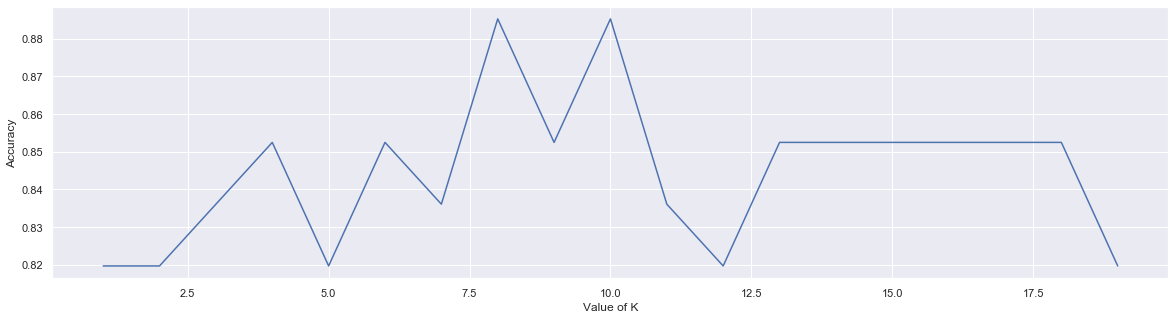

In [39]:
#finding k value
Krange = range(1,20)
accuracy = {}
accuracy_list = []
for k in Krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy[k] = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy_score(y_test,y_pred))
    
print("For k = {}, accuracy = {}".format(k,accuracy))

    
plt.plot(Krange,accuracy_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  9]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.78      0.94      0.85        34

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61



In [41]:
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [43]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)

[[18  9]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.78      0.94      0.85        34

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61

81.9672131147541


In [56]:
prediction_output = pd.DataFrame(data=[y_test.values,y_pred], index = ['y_test','y_pred']).transpose()

In [57]:
prediction_output.to_csv('E:/Netzwerk/Practice/Heart Disease/Heart_Disease_KNN_output.csv')

### Logistic Regression

In [49]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = log.predict(X_test)

In [51]:
accuracy1=confusion_matrix(y_test,predictions)
accuracy1

array([[21,  6],
       [ 4, 30]], dtype=int64)

In [52]:
accuracy1=accuracy_score(y_test,predictions)
accuracy1


0.8360655737704918

In [53]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [58]:
prediction_output = pd.DataFrame(data=[y_test.values,predictions], index = ['y_test','y_pred']).transpose()
prediction_output.to_csv('E:/Netzwerk/Practice/Heart Disease/Heart_Disease_Linear_Regression_output.csv')

### Decision Tree classifier

In [59]:
criterion = ['gini','entropy']
splitter = ['best','random']

Tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy']}

tree_classifier = GridSearchCV(Tree, parameters, scoring='neg_mean_squared_error' ,cv =5)
tree_classifier.fit(X_train, y_train)
tree_classifier.best_params_




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini'}

In [62]:
model2 = DecisionTreeClassifier(criterion = 'entropy')
model2.fit(X_train,y_train)
accuracy2 = model2.score(X_test,y_test)
accuracy2 = accuracy_score(y_test,predictions)
print('Decision Tree Accuracy -->',((accuracy2)*100))

Decision Tree Accuracy --> 83.60655737704919


In [63]:
prediction_output = pd.DataFrame(data=[y_test.values,predictions], index = ['y_test','y_pred']).transpose()
prediction_output.to_csv('E:/Netzwerk/Practice/Heart Disease/Heart_Disease_Decision_Tree_Classifier_output.csv')

### Random Forest 

In [64]:
model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

accuracy_score(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8852459016393442

In [65]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#hyperparameters values
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : randint(5, 9),
    'max_features': randint(1, 9),
    'min_samples_leaf': randint(1, 9),
    'n_estimators': randint(100,250)
}
#### initial model
model3 = RandomForestClassifier()
random_search = RandomizedSearchCV(model3,param_distributions = params,cv = 10)

In [66]:
random_search.fit(X_train,y_train)
random_search.best_params_
random_search.best_estimator_
random_search.best_score_


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8429752066115702

In [67]:
best_random = random_search.best_estimator_
y_pred = best_random.predict(X_test)
accuracy_score(y_test,y_pred)
accuracy_score

<function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>

In [68]:
prediction_output = pd.DataFrame(data=[y_test.values,y_pred], index = ['y_test','y_pred']).transpose()
prediction_output.to_csv('E:/Netzwerk/Practice/Heart Disease/Heart_Disease_Random_Forest_output.csv')

# Supported Vector Classifier

In [69]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, kernel='rbf', gamma=0.1, C=1.0)

In [70]:
params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_param = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")

In [71]:
svm_param.fit(X_train, y_train)
#Best params selected by GridSearchCV
svm_param.best_params_

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:   11.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}

In [72]:
svc_acc_train = svm_param.score(X_train, y_train)*100
svc_acc_test = svm_param.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(svc_acc_train))
print("Test Accuracy {:.2f}%".format(svc_acc_test))

Train Accuracy 83.06%
Test Accuracy 81.97%


In [73]:
#Predictions
predict = svm_param.predict(X_test)

In [74]:
svc_acc_train = svm_param.score(X_train, y_train)*100
svc_acc_test = svm_param.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(svc_acc_train))
print("Test Accuracy {:.2f}%".format(svc_acc_test))

Train Accuracy 83.06%
Test Accuracy 81.97%


In [75]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        34

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



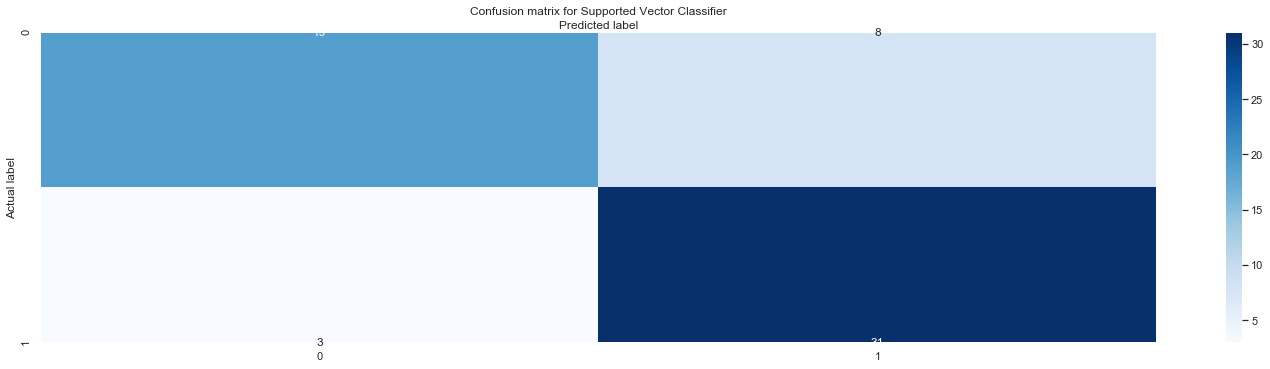

In [76]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,predict)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues',
           fmt = 'g')

ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Supported Vector Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [77]:
prediction_output = pd.DataFrame(data=[y_test.values,predict], index = ['y_test','y_pred']).transpose()
prediction_output.to_csv('E:/Netzwerk/Practice/Heart Disease/Heart_Disease_SVM_output.csv')